In [21]:
import pandas as pd
import re
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import math
from wordcloud import WordCloud

pd.options.display.max_columns = None
plt.rcParams["figure.figsize"] = (10,8)


---

### Salario: para promocionar próximas formaciones q25 acorde con el puesto de trabajo(q5), el género(q2) y la edad(q1) 

---

In [22]:
df = pd.read_csv("../Archivos/profesionales_nonull.csv", index_col= 0)

In [23]:
df.head(3)

,edad,genero,pais,estudios,puesto_trabajo,experiencia,lenguaje_recomendado,experiencia_ML,industria,tamaño_empresa,herramienta_DA,lenguaje_utilizado,IDE,herramientas_visualizacion,Q16_frame_ml,Q17_alg_ml,Q32_prod_bigdata,Q34_herramientas_bi,Q28,q10_notebooks,q39_plat_compartir_trabajo,q40_plat_cursos,q27_plat_familiar_cloud_computing,q29b_productos_familiar_cloud_computing,q31b_productos_familiar_ml,q32b_productos_familiar_bd,q34b_herramientas_familiar_bi,q36b_cat_herramientas_familiar_ml,q37b_cat_herramientas_familiar_ml_aut,q38b_herramientas_familiar_gest_exp_ml,salario
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,5-10 years,Manufacturing/Fabrication,50-249 employees,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",PostgreSQL,None,NaN,Colab Notebooks,"GitHub , Kaggle","Coursera,edX,Kaggle Learn Courses,DataCamp,Uda...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30000.0
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,< 1 year,Manufacturing/Fabrication,"1000-9,999 employees","Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",Matplotlib,Scikit-learn,"Linear or Logistic Regression, Decision Trees ...",NaN,NaN,NaN,"Kaggle Notebooks,Colab Notebooks",NaN,"Kaggle Learn Courses,Cloud-certification progr...","Google Cloud Platform (GCP) , Oracle Cloud",Google Cloud Compute Engine,None,"MySQL ,SQLite ,Oracle Database ,Google Cloud SQL","Google Data Studio,Qlik","Automated model selection (e.g. auto-sklearn, ...",Google Cloud AutoML,None,70000.0
2,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,I do not use machine learning methods,Academics/Education,"1000-9,999 employees","Basic statistical software (Microsoft Excel, G...","Python, C++, Java","PyCharm ,Jupyter Notebook, Other",Matplotlib,NaN,NaN,"MySQL , MongoDB",None,NaN,Kaggle Notebooks,I do not share my work publicly,DataCamp,"Amazon Web Services (AWS) , Google Cloud Plat...","Microsoft Azure Virtual Machines , Google Clo...","Azure Machine Learning Studio , Google Cloud ...","MySQL ,PostgreSQL ,MongoDB","Microsoft Power BI,Tableau","Automated model selection (e.g. auto-sklearn, ...",DataRobot AutoML,TensorBoard,1000.0


In [24]:
df.salario.isnull().sum()

0

In [25]:
def limpiar(col):
    try:
        return col.replace("+","").split("-")[0]
    except:
        return col

In [26]:
df["edad_num"] = df["edad"].apply(limpiar).astype("float64", errors= "raise")


In [27]:
def truncar(col):
    return math.trunc(col)

In [28]:
df["salario"] = df['salario'].apply(truncar)

In [29]:
df["salario"] = df["salario"].astype("float64", errors= "raise")

In [30]:
df["salario"].unique()

array([3.000000e+04, 7.000000e+04, 1.000000e+03, 4.000000e+04,
       2.000000e+04, 8.000000e+04, 3.000000e+03, 1.500000e+04,
       4.911600e+04, 7.500000e+03, 2.500000e+04, 2.000000e+03,
       1.250000e+05, 1.000000e+04, 5.000000e+03, 5.000000e+04,
       6.000000e+04, 4.000000e+03, 5.000000e+05, 2.500000e+05,
       1.500000e+05, 3.000000e+05, 9.000000e+04, 1.000000e+05,
       2.000000e+05, 1.000001e+06, 1.000000e+06])

In [31]:
df.dtypes

edad                                        object
genero                                      object
pais                                        object
estudios                                    object
puesto_trabajo                              object
experiencia                                 object
lenguaje_recomendado                        object
experiencia_ML                              object
industria                                   object
tamaño_empresa                              object
herramienta_DA                              object
lenguaje_utilizado                          object
IDE                                         object
herramientas_visualizacion                  object
Q16_frame_ml                                object
Q17_alg_ml                                  object
Q32_prod_bigdata                            object
Q34_herramientas_bi                         object
Q28                                         object
q10_notebooks                  

In [44]:
paleta = ("husn", 8)

In [48]:
sns.set_palette("husl", 8)

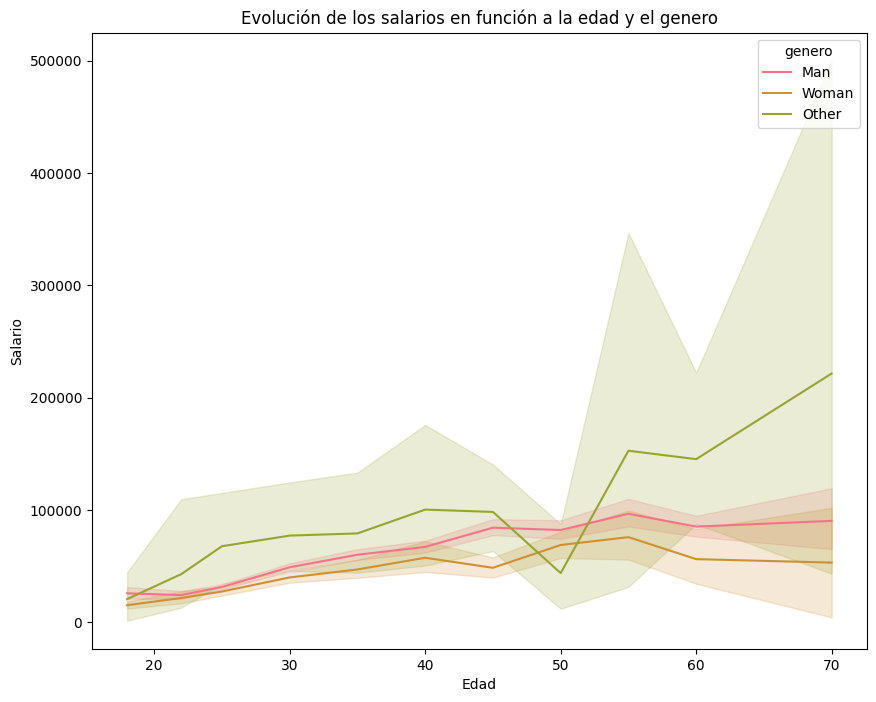

In [49]:
fig = sns.lineplot(x='edad_num', y = 'salario', data = df, hue = 'genero')
# cambiamos el nombre de los ejes
fig.set(xlabel='Edad', ylabel = 'Salario')
# ponemos título a la gráfica
fig.set_title('Evolución de los salarios en función a la edad y el genero');

In [34]:
df.genero.value_counts()

Man      14026
Woman     2853
Other      304
Name: genero, dtype: int64

In [35]:
#!pip install wordcloud

In [36]:
text = " ".join(review for review in df.puesto_trabajo.astype(str))
# Read the whole text.
text = text

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

def blue_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(173, 62%%, %d%%)" % random.randint(20, 100)

# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(background_color="white",max_words=len(text),max_font_size=40, relative_scaling=.5).generate(text)
plt.figure()
plt.imshow(wordcloud.recolor(color_func=blue_color_func, random_state=3), interpolation='bilinear')
plt.axis("off")

plt.show()

NameError: name 'random' is not defined

<Figure size 1000x800 with 0 Axes>

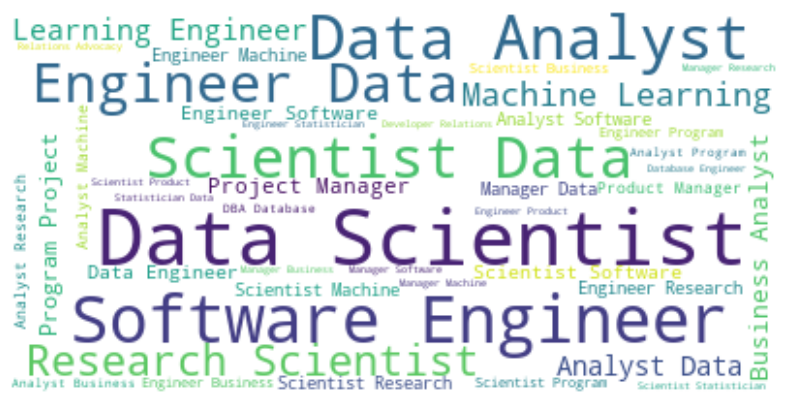

In [37]:
text = " ".join(review for review in df.puesto_trabajo.astype(str))
# Read the whole text.
text = text

# Generate a word cloud image
wordcloud = WordCloud().generate(text)


# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(background_color="white",max_words=len(text),max_font_size=40, relative_scaling=.5).generate(text)
plt.figure()
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")

plt.show()

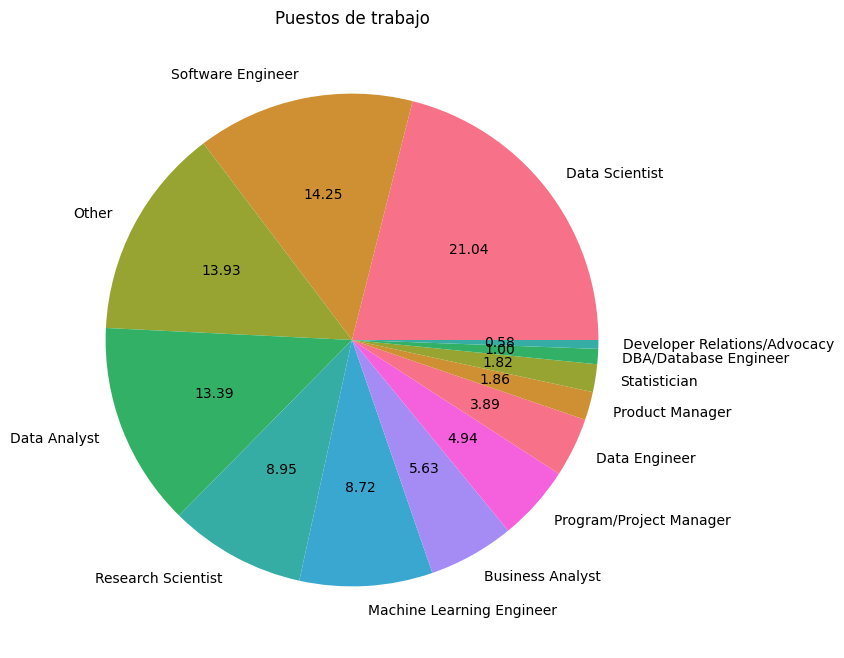

In [50]:
df_pieplot = df['puesto_trabajo'].value_counts().reset_index()
plt.figure()
plt.pie(df_pieplot['puesto_trabajo'], labels= df_pieplot["index"], autopct= '%.2f')
plt.title("Puestos de trabajo")
plt.show()

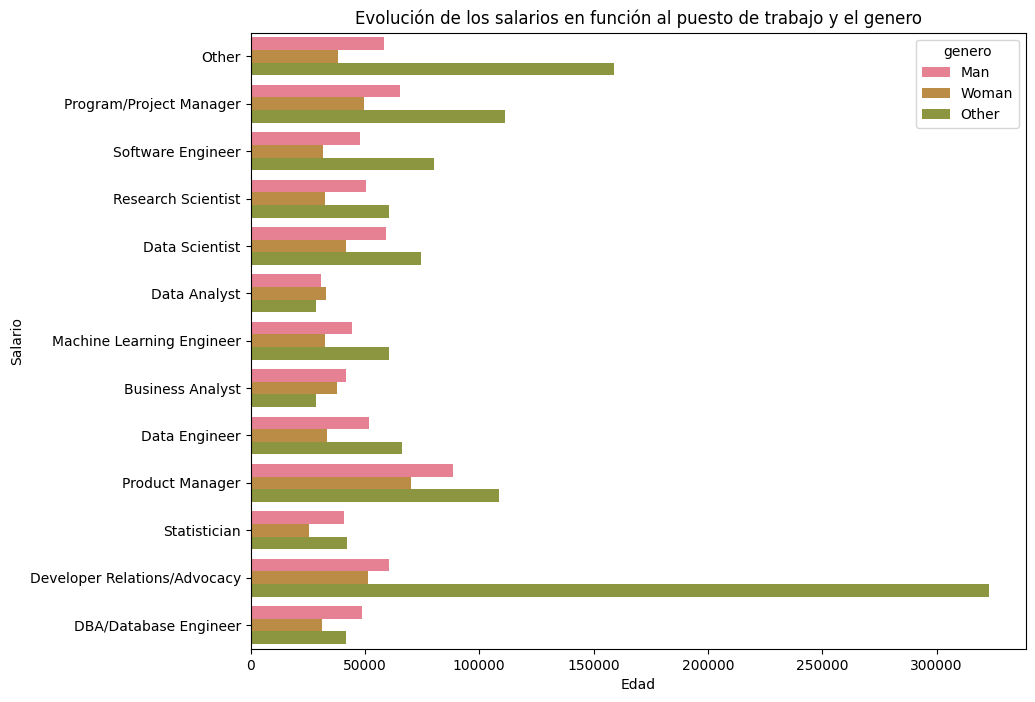

In [51]:
fig = sns.barplot(y='puesto_trabajo', x = 'salario', data = df, hue='genero', errorbar=('ci',0))
# cambiamos el nombre de los ejes
fig.set(xlabel='Edad', ylabel = 'Salario')
# ponemos título a la gráfica
fig.set_title('Evolución de los salarios en función al puesto de trabajo y el genero');

In [52]:
df_grafica =df[ df['genero'] != 'Other']

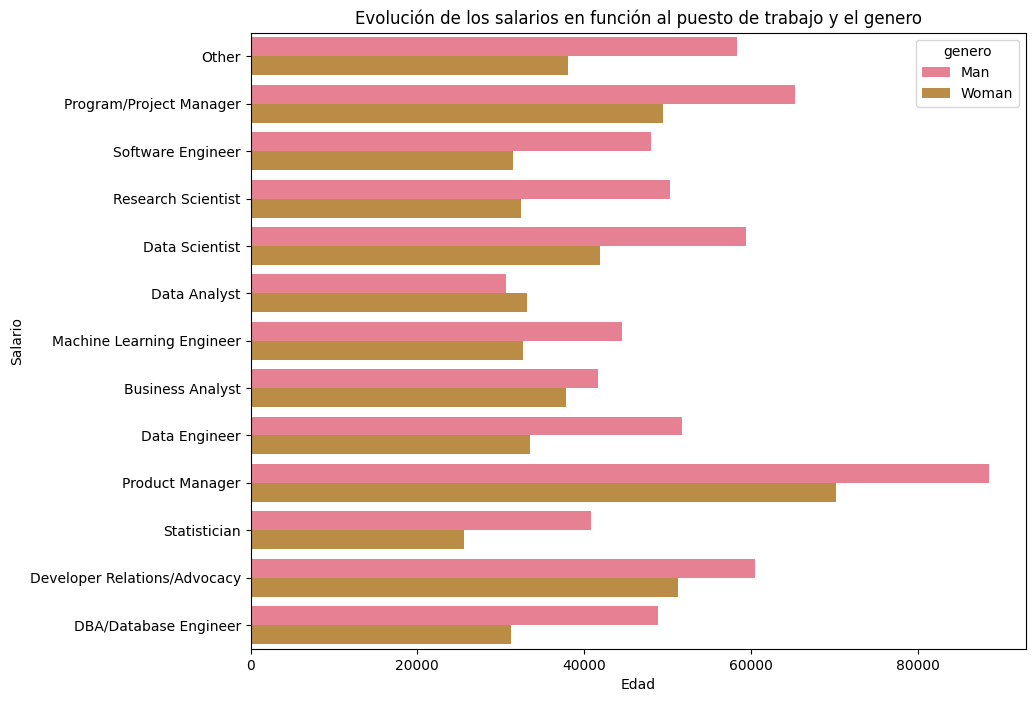

In [53]:
fig = sns.barplot(y='puesto_trabajo', x = 'salario', data = df_grafica, hue='genero', errorbar=('ci',0))
# cambiamos el nombre de los ejes
fig.set(xlabel='Edad', ylabel = 'Salario')
# ponemos título a la gráfica
fig.set_title('Evolución de los salarios en función al puesto de trabajo y el genero');

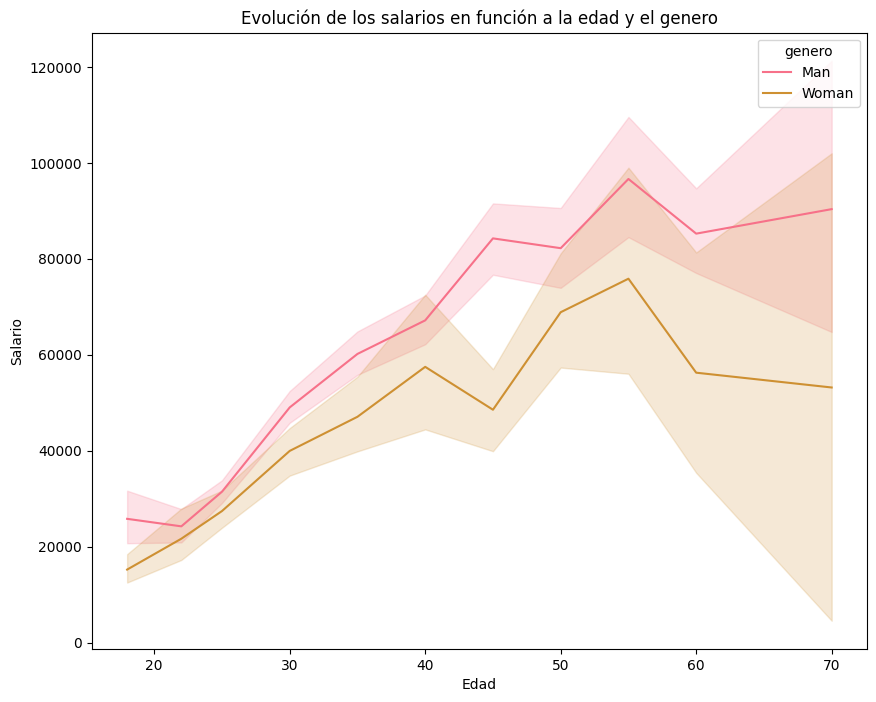

In [54]:
fig = sns.lineplot(x='edad_num', y = 'salario', data = df_grafica, hue = 'genero')
# cambiamos el nombre de los ejes
fig.set(xlabel='Edad', ylabel = 'Salario')
# ponemos título a la gráfica
fig.set_title('Evolución de los salarios en función a la edad y el genero');

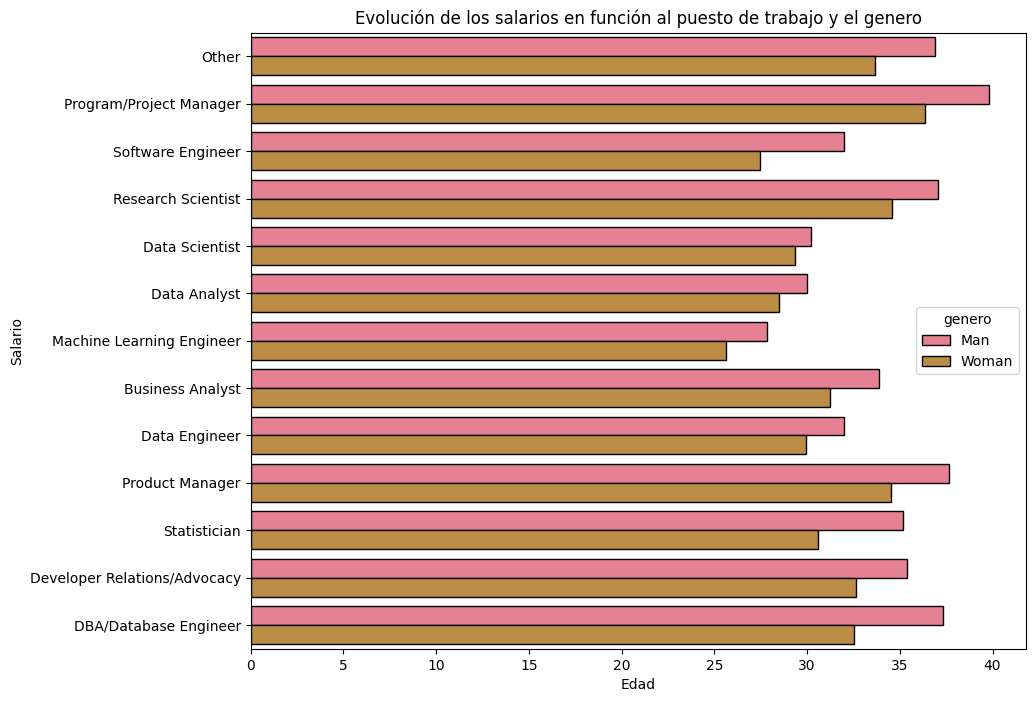

In [57]:
fig = sns.barplot(y='puesto_trabajo', x = 'edad_num', data = df_grafica, hue='genero', errorbar=('ci',0), edgecolor ='black')
# cambiamos el nombre de los ejes
fig.set(xlabel='Edad', ylabel = 'Puesto de trabajo')
# ponemos título a la gráfica
fig.set_title('Evolución de los salarios en función al puesto de trabajo y el genero');